# **Palmer Penguins**
### Author: *Paul Cahill*

![Penguins](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Gentoo_Penguin_AdF.jpg/640px-Gentoo_Penguin_AdF.png)

This notebook contains my analysis of the famous palmer penguins dataset.

The dataset is available on GitHub [here](https://allisonhorst.github.io/palmerpenguins/).

My analysis will follow the structure below:

- Libraries: we will import and explain the use of our Python libraries.
- Loading the Data: importing the dataset from a URL.
- Overview of the Data: Quick overview of the Palmer Penguins dataset.
- Types: 
- Plotting: a bar chart and histogram.
- Correlation: scatterplot and .


***
## Libraries

Pandas is used for the DataFrame data structure. It allows us to investigate CSV files, amongst other features.

Matplotlib is a plotting library. Pyplot allows for interactive plots and programmatic plot generation.

Numpy is a library used for numerical computing. We will use it to support multidimensional arrays.

In [31]:
#Data frames.
import pandas as pd

#Plotting
import matplotlib.pyplot as plt

#Numerical Arrays
import numpy as np

***
## Loading the Data

The palmer penguins dataset is loaded from a URL.

In [32]:
#Load the Penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

Having loaded the data, it can now be examined on a surface level.


In [33]:
#Having a look
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


***
## Overview of the Data

Now that the dataset is loaded in we can begin to explore the data held within it. Let's start by checking the types of data.

In [34]:
#Inspecting types
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Next we can run the dataset through the describe function to examine the peramiteres of the numerical data (as we can see above, these are all floats).

In [35]:
#Summary of data
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


This dataset focuses on three species of penguins across three islands in the Palmer Archipeligo.

We can check what these species are and how many of them were recorded on each island.

In [36]:
# Grouping by species and island and counting the number of penguins
penguins_by_species_island = df.groupby(['species', 'island']).size().reset_index(name='count')

# Displaying the counts
penguins_by_species_island

,species,island,count
0,Adelie,Biscoe,44
1,Adelie,Dream,56
2,Adelie,Torgersen,52
3,Chinstrap,Dream,68
4,Gentoo,Biscoe,124


Evidently, there are 344 penguins involved in the study. These are made up of:

- 68 **Chinstrap** penguins (all recorded on Dream).
- 124 **Gentoo** penguins (all recorded on Biscoe).
- 152 **Adelie** penguins (spread across Dream, Biscoe and Torgersen).

***
## Plotting

Having an understanding of the structure of the data and the variables within it, we can begin to analyse it in greater depth.


***
## Correlation

***
## Two Variable Plots

Let's compare two variables; flipper length and body mass.

We can use numpy to create an array for the two variables (this isolate the raw values from the dataframe)

We will then use matplotlib to plot them.

In [37]:
#Flipper length
flength = df['flipper_length_mm'].to_numpy()

#Show(first values)
print(flength[:25])

#Type
print(type(flength))

[181. 186. 195.  nan 193. 190. 181. 195. 193. 190. 186. 180. 182. 191.
 198. 185. 195. 197. 184. 194. 174. 180. 189. 185. 180.]
<class 'numpy.ndarray'>


In [38]:
#body mass
bmass = df['body_mass_g'].to_numpy()

#Show(first values)
print(bmass[:25])

#Type
print(type(bmass))

[3750. 3800. 3250.   nan 3450. 3650. 3625. 4675. 3475. 4250. 3300. 3700.
 3200. 3800. 4400. 3700. 3450. 4500. 3325. 4200. 3400. 3600. 3800. 3950.
 3800.]
<class 'numpy.ndarray'>


Having the two arrays we can now plot them together on a scatterplot.

Before we do this, let's create a line of best fit to add to that plot. We will need to remove NaN values first.

In [39]:
# Check for NaN values in flength and bmass
nan_indices = np.isnan(flength) | np.isnan(bmass)

# Remove NaN values from flength and bmass
flength_clean = flength[~nan_indices]
bmass_clean = bmass[~nan_indices]

# Calculate the line of best fit
m, c = np.polyfit(flength_clean, bmass_clean, 1)

#show m and c
m, c

(49.68556640610011, -5780.831358077061)

Next, let's create 100 values per axes to plot a best fit line

In [40]:
#x values for best fit line
bf_x = np.linspace(170, flength_clean.max() + 1, 100)

#y values for best fit line
bf_y = m * bf_x + c

We then plot the two variables along with the line of best fit and label the two axes.

(2500.0, 6500.0)

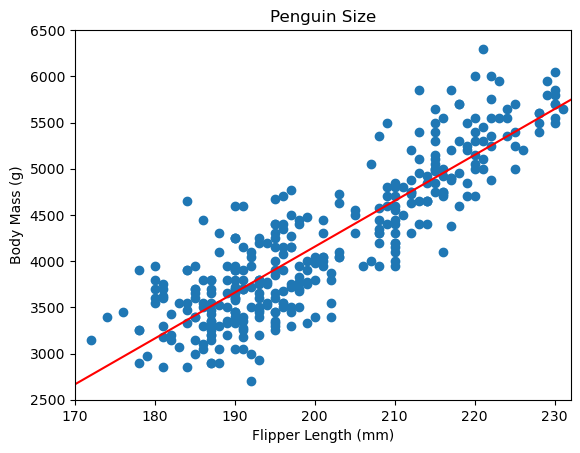

In [41]:
#creating figure and set of axes.
fig, ax = plt.subplots()

#plotting
ax.plot(flength, bmass, 'o')

#plotting line of best fit
ax.plot(bf_x, bf_y, 'r-')

#Axis Labels
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Body Mass (g)')

#Title
ax.set_title('Penguin Size')

# X Limits
ax.set_xlim(170, 232)

# Y Limits
ax.set_ylim(2500, 6500)

In [43]:
#Measuring the correlation
np.corrcoef(flength_clean, bmass_clean)

array([[1.        , 0.87120177],
       [0.87120177, 1.        ]])

The correlation coefficient is 0.87.

Evidently, there is a strong correlation between the length of a penguins flipper and its body mass.

***
## References

1. [Solomon, Brad. Real Python, "Python Plotting with Matplotlib (Guide)."](https://realpython.com/python-matplotlib-guide/)
2.
3.

***

### End

***